In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from os.path import sep
from sklearn import metrics
import sys
sys.path.append('../')
from Code1.plotting_functions import get_figure_win
from Code1.Train_Test_Data import train_test
from Code1.ZPlot import plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

import os

figure_panel_dir = 'Figure panels'

    


# Train Test Split

In [14]:
scaler = StandardScaler()
Name='j'
Train='j'
Test = 'j'
Target='Status'
X_train,y_train,machine_ids_train, X_test,y_test,machine_ids_test = train_test(Train,Test,Target)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Figure Panel

In [15]:
# Figure sizing for two window

fig_size_cm = [16.5, 6]                     # [width, height]
plot_rect_cm = [2, 1.5, 13.75, 3.75]      # [left, bottom, width, height]
n_subfigs = [1, 1]                        # [n_rows, n_cols]
hor_ver_sep_cm = [2.2, 0]                 # [hor, ver]

In [16]:
def figure (y_test, scores_n,label):
    fpr,tpr,thresholds_n= metrics.roc_curve(y_test, scores_n) 
    fig, axs = get_figure_win(fig_size_cm, plot_rect_cm, n_subfigs, hor_ver_sep_cm)
    auc_n = roc_auc_score(y_test, scores_n)
    plt.plot(fpr, tpr, color='blue', label=label+'= %1.3f' %auc_n)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC_AUC_Score')
    plt.legend(loc="lower right")
    plt.show()
    fig.savefig(figure_panel_dir + os.sep + 'ROC_NN.png', dpi=300)  # Raster image

# Nearest Neighbors Performance

In [17]:
from sklearn.neighbors import NearestNeighbors

Model= NearestNeighbors(n_neighbors=1, algorithm='ball_tree')  # KNeighborsClassifier has been defined with variable hyperperameter

Model.fit(X_train)

Z_normal,indices = Model.kneighbors(X_test)
scores_n = Z_normal.mean(axis=1)
        
fpr_n,tpr_n,thresholds_n= metrics.roc_curve(y_test, scores_n)
auc_n = roc_auc_score(y_test, scores_n)

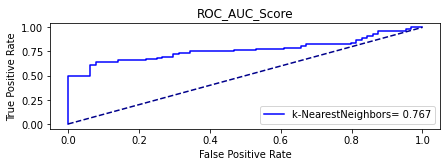

In [18]:
figure(y_test, scores_n,"k-NearestNeighbors")

# One Class SVM

In [19]:
from sklearn.svm import OneClassSVM as SV

SVM= SV(nu=0.1,kernel="rbf",gamma=0.2)   # One class SVM has been defined with variable hyperperameter
SVM.fit(X_train)

scores_SVM = -1*SVM.decision_function(X_test)

        
fpr_SVM,tpr_SVM,thresholds_SVM= metrics.roc_curve(y_test, scores_SVM) 
auc_SVM = roc_auc_score(y_test, scores_SVM)

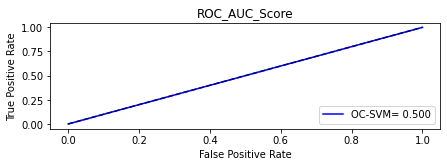

In [20]:
figure(y_test, scores_SVM,"OC-SVM")


# Isolation Forest

In [21]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators =6, max_samples = 4,random_state= 0)  # IsolationForest has been defined with variable hyperperameter
model.fit(X_train)

scores_Iso = -1*model.decision_function(X_test) #Scores for X_new_normal
        
fpr_Iso,tpr_Iso,thresholds_Iso= metrics.roc_curve(y_test, scores_Iso) 
auc_Iso = roc_auc_score(y_test, scores_Iso)

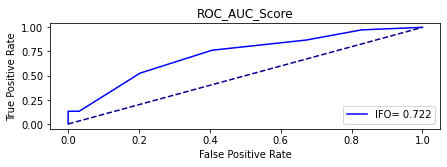

In [22]:
figure(y_test, scores_Iso,"IFO")

# Auto Encoder

In [23]:
import matplotlib.cm as cm
from sklearn.decomposition import PCA


pca= PCA(n_components=50,random_state=1)                                  # PCA has been defined with variable hyperperameter
pca.fit(X_train)
pca_proj_back=pca.inverse_transform(pca.transform(X_test))         #Applying inversePCA on each point of the rectangular grid
diff_sq = ((X_test)-pca_proj_back)**2                           #Calculating the difference betwen pca2_results and pca2_proj_back
                                 
scores_PCA = np.mean(diff_sq, axis=1)                             # Calculating the regenaration error 
#scores_PCA=mean_squared_error(X_test, pca_proj_back)
          
        
fpr_PCA,tpr_PCA,thresholds_PCA= metrics.roc_curve(y_test, scores_PCA) 
auc_PCA = roc_auc_score(y_test, scores_PCA)

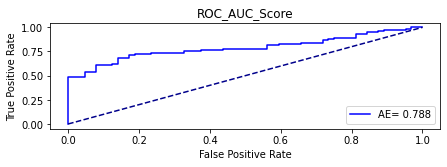

In [24]:
figure(y_test, scores_PCA,"AE")

# Combined Figures

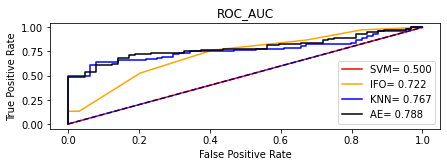

In [25]:
fig, axs = get_figure_win(fig_size_cm, plot_rect_cm, n_subfigs, hor_ver_sep_cm)
plt.plot(fpr_SVM, tpr_SVM, color='red', label='SVM'+'= %1.3f' %auc_SVM)
plt.plot(fpr_Iso, tpr_Iso, color='orange', label='IFO'+'= %1.3f' %auc_Iso)
plt.plot(fpr_n, tpr_n, color='blue', label='KNN'+'= %1.3f' %auc_n)
plt.plot(fpr_PCA, tpr_PCA, color='black', label='AE'+'= %1.3f' %auc_PCA)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC')
plt.legend(loc="lower right")
#plt.show()
fig.savefig(figure_panel_dir + os.sep + 'ROC_AUC_1.png', dpi=300)  # Raster image


# LOF

In [27]:
from sklearn import metrics
from sklearn.neighbors import LocalOutlierFactor

Model= LocalOutlierFactor(n_neighbors=4,contamination=0.01,novelty= True)  # LocalOutlierFactor has been defined with variable hyperperameter

Model.fit(X_train)

scores_LOF= (-1) * Model.decision_function(X_test)

        
fpr_L,tpr_L,thresholds_L= metrics.roc_curve(y_test, scores_LOF)
auc_LOF = roc_auc_score(y_test, scores_LOF)

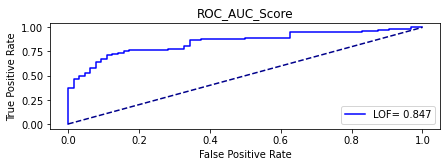

In [28]:
figure(y_test, scores_LOF,"LOF")

# Applying PCA to nearest neigh bor

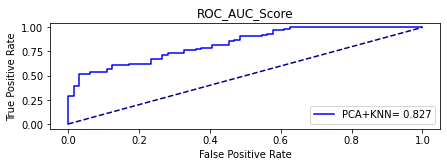

In [29]:
pca = PCA(n_components=10,random_state=1) 
X_train1=pca.fit_transform(X_train)
X_test1=pca.transform(X_test)






NearestN = NearestNeighbors(n_neighbors=1)
NearestN.fit(X_train1)

distances, indices = NearestN.kneighbors(X_test1)
scores_HB=distances.mean(axis=1)
fpr_HB,tpr_HB,thresholds_HB= metrics.roc_curve(y_test, scores_HB) 
auc_HB = roc_auc_score(y_test, scores_HB)

figure(y_test, scores_HB,"PCA+KNN")

# Local OutlierFactor with PCA

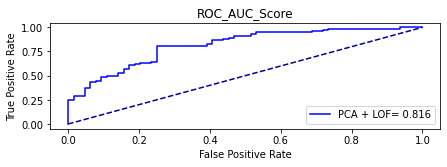

In [35]:
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
pca = PCA(n_components=24,random_state=1) 
X_train1=pca.fit_transform(X_train)
X_test1=pca.transform(X_test)

Model= LocalOutlierFactor(n_neighbors=3,contamination=0.01,novelty= True)  # LocalOutlierFactor has been defined with variable hyperperameter

Model.fit(X_train1)

Z_normal= Model.decision_function(X_test1)
scores_HB2 = Z_normal*(-1)
        
fpr_HB2,tpr_HB2,thresholds_HB2= metrics.roc_curve(y_test, scores_HB2) 
auc_LOFP = roc_auc_score(y_test, scores_HB2)

figure(y_test, scores_HB2,"PCA + LOF")

# Combined Figures

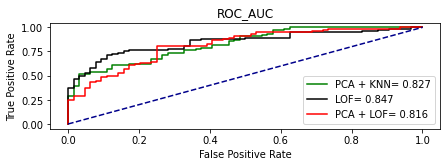

In [36]:
fig, axs = get_figure_win(fig_size_cm, plot_rect_cm, n_subfigs, hor_ver_sep_cm)
plt.plot(fpr_HB, tpr_HB, color='green', label='PCA + KNN'+'= %1.3f' %auc_HB)
plt.plot(fpr_L, tpr_L, color='k', label='LOF'+'= %1.3f' %auc_LOF)
plt.plot(fpr_HB2, tpr_HB2, color='red', label='PCA + LOF'+'= %1.3f' %auc_LOFP)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC')
plt.legend(loc="lower right")
#plt.show()
fig.savefig(figure_panel_dir + os.sep + 'ROC_AUC_2.png', dpi=300)  # Raster image